In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import statistics as stat
from scipy import stats as st
from scipy.stats import shapiro, ttest_ind

In [3]:
drive.mount('/content/gdrive')
femaleBaseFreq = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Статистика/femaleBaseFreq.csv',
                     header = 'infer', sep=';', decimal = ',')
femaleBaseFreq.head()

Mounted at /content/gdrive


,happiness,sadness,anger,surprise,fear,disgust,neutral
0,271.8,180.5,245.7,199.1,238.8,172.9,185.2
1,198.6,130.2,205.7,170.9,150.2,167.9,146.2
2,245.4,193.2,270.7,210.2,280.8,240.1,202.8
3,278.9,210.9,280.1,254.8,270.4,250.7,222.9
4,249.3,178.1,218.9,207.4,220.7,217.3,185.2


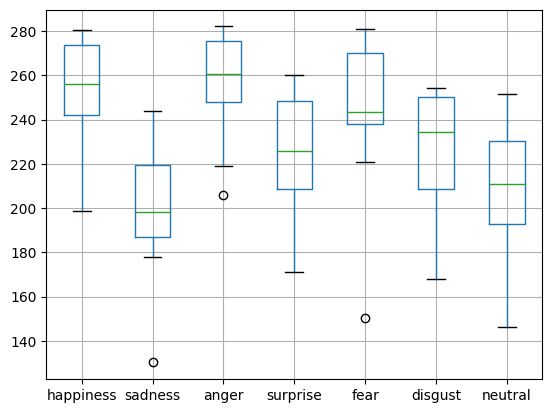

In [4]:
boxplot = femaleBaseFreq.boxplot()

In [5]:
f_value, p_value = st.f_oneway(femaleBaseFreq['happiness'],
                               femaleBaseFreq['sadness'],
                               femaleBaseFreq['anger'],
                               femaleBaseFreq['surprise'],
                               femaleBaseFreq['fear'],
                               femaleBaseFreq['disgust'],
                               femaleBaseFreq['neutral'])
if p_value > 0.05:
    print('Принимаем H0 о равенстве средних')
else:
    print('Отвергаем H0 о равенстве средних')

Отвергаем H0 о равенстве средних


In [6]:
m = len(femaleBaseFreq.axes[1])
alpha = 0.05
for i in range(m):
  for j in range(m):
    x = femaleBaseFreq.iloc[:, [i]]
    y = femaleBaseFreq.iloc[:, [j]]
    ttest_ind_res = ttest_ind(x, y)

    print('Группа 1: ' + femaleBaseFreq.columns[i] +
          ' группа 2: ' + femaleBaseFreq.columns[j])
    print('p-value = ' + str(round(ttest_ind_res.pvalue[0], 3)))

    print('Различия между группами есть.\n') \
    if ttest_ind_res.pvalue[0] < alpha \
    else print('Различий между группами нет.\n')

Группа 1: happiness группа 2: happiness
p-value = 1.0
Различий между группами нет.

Группа 1: happiness группа 2: sadness
p-value = 0.0
Различия между группами есть.

Группа 1: happiness группа 2: anger
p-value = 0.881
Различий между группами нет.

Группа 1: happiness группа 2: surprise
p-value = 0.016
Различия между группами есть.

Группа 1: happiness группа 2: fear
p-value = 0.514
Различий между группами нет.

Группа 1: happiness группа 2: disgust
p-value = 0.02
Различия между группами есть.

Группа 1: happiness группа 2: neutral
p-value = 0.001
Различия между группами есть.

Группа 1: sadness группа 2: happiness
p-value = 0.0
Различия между группами есть.

Группа 1: sadness группа 2: sadness
p-value = 1.0
Различий между группами нет.

Группа 1: sadness группа 2: anger
p-value = 0.0
Различия между группами есть.

Группа 1: sadness группа 2: surprise
p-value = 0.059
Различий между группами нет.

Группа 1: sadness группа 2: fear
p-value = 0.006
Различия между группами есть.

Группа 1: 

In [7]:
m = len(femaleBaseFreq.axes[1])
alpha = 0.05
k = m*(m-1)/2
alpha_1 = alpha/k

for i in range(m):
  for j in range(i+1, m):
    x = femaleBaseFreq.iloc[:, [i]]
    y = femaleBaseFreq.iloc[:, [j]]
    ttest_ind_res = ttest_ind(x, y)

    print('Группа 1: ' + femaleBaseFreq.columns[i] +
          ' группа 2: ' + femaleBaseFreq.columns[j])
    print('p-value = ' + str(round(ttest_ind_res.pvalue[0], 3)))

    print('Различия между группами есть.\n') \
    if ttest_ind_res.pvalue[0] < alpha_1 \
    else print('Различий между группами нет.\n')

Группа 1: happiness группа 2: sadness
p-value = 0.0
Различия между группами есть.

Группа 1: happiness группа 2: anger
p-value = 0.881
Различий между группами нет.

Группа 1: happiness группа 2: surprise
p-value = 0.016
Различий между группами нет.

Группа 1: happiness группа 2: fear
p-value = 0.514
Различий между группами нет.

Группа 1: happiness группа 2: disgust
p-value = 0.02
Различий между группами нет.

Группа 1: happiness группа 2: neutral
p-value = 0.001
Различия между группами есть.

Группа 1: sadness группа 2: anger
p-value = 0.0
Различия между группами есть.

Группа 1: sadness группа 2: surprise
p-value = 0.059
Различий между группами нет.

Группа 1: sadness группа 2: fear
p-value = 0.006
Различий между группами нет.

Группа 1: sadness группа 2: disgust
p-value = 0.089
Различий между группами нет.

Группа 1: sadness группа 2: neutral
p-value = 0.496
Различий между группами нет.

Группа 1: anger группа 2: surprise
p-value = 0.012
Различий между группами нет.

Группа 1: anger

In [8]:
res = st.tukey_hsd(femaleBaseFreq['happiness'],
                   femaleBaseFreq['sadness'],
                   femaleBaseFreq['anger'],
                   femaleBaseFreq['surprise'],
                   femaleBaseFreq['fear'],
                   femaleBaseFreq['disgust'],
                   femaleBaseFreq['neutral'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     54.264     0.001    15.650    92.877
 (0 - 2)     -1.627     1.000   -40.241    36.986
 (0 - 3)     29.336     0.256    -9.277    67.950
 (0 - 4)      9.009     0.992   -29.604    47.622
 (0 - 5)     30.555     0.213    -8.059    69.168
 (0 - 6)     45.273     0.011     6.659    83.886
 (1 - 0)    -54.264     0.001   -92.877   -15.650
 (1 - 2)    -55.891     0.001   -94.504   -17.278
 (1 - 3)    -24.927     0.449   -63.541    13.686
 (1 - 4)    -45.255     0.011   -83.868    -6.641
 (1 - 5)    -23.709     0.511   -62.322    14.904
 (1 - 6)     -8.991     0.992   -47.604    29.622
 (2 - 0)      1.627     1.000   -36.986    40.241
 (2 - 1)     55.891     0.001    17.278    94.504
 (2 - 3)     30.964     0.200    -7.650    69.577
 (2 - 4)     10.636     0.980   -27.977    49.250
 (2 - 5)     32.182     0.165    -6.431    70.795
 (2 - 6)     46.900     0.008   

In [10]:
happiness_and_anger = femaleBaseFreq['happiness'].to_list() + femaleBaseFreq['anger'].to_list()
res = st.tukey_hsd(happiness_and_anger,
                   femaleBaseFreq['sadness'],
                   femaleBaseFreq['surprise'],
                   femaleBaseFreq['fear'],
                   femaleBaseFreq['disgust'],
                   femaleBaseFreq['neutral'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     55.077     0.000    23.037    87.117
 (0 - 2)     30.150     0.077    -1.890    62.190
 (0 - 3)      9.823     0.946   -22.217    41.863
 (0 - 4)     31.368     0.058    -0.672    63.408
 (0 - 5)     46.086     0.001    14.046    78.126
 (1 - 0)    -55.077     0.000   -87.117   -23.037
 (1 - 2)    -24.927     0.368   -61.924    12.069
 (1 - 3)    -45.255     0.008   -82.251    -8.258
 (1 - 4)    -23.709     0.425   -60.706    13.288
 (1 - 5)     -8.991     0.980   -45.988    28.006
 (2 - 0)    -30.150     0.077   -62.190     1.890
 (2 - 1)     24.927     0.368   -12.069    61.924
 (2 - 3)    -20.327     0.595   -57.324    16.669
 (2 - 4)      1.218     1.000   -35.778    38.215
 (2 - 5)     15.936     0.805   -21.060    52.933
 (3 - 0)     -9.823     0.946   -41.863    22.217
 (3 - 1)     45.255     0.008     8.258    82.251
 (3 - 2)     20.327     0.595   

In [11]:
surprise_and_disgust = femaleBaseFreq['surprise'].to_list() + femaleBaseFreq['disgust'].to_list()
res = st.tukey_hsd(happiness_and_anger,
                   femaleBaseFreq['sadness'],
                   surprise_and_disgust,
                   femaleBaseFreq['fear'],
                   femaleBaseFreq['neutral'])
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     55.077     0.000    24.680    85.474
 (0 - 2)     30.759     0.008     5.940    55.578
 (0 - 3)      9.823     0.894   -20.574    40.220
 (0 - 4)     46.086     0.001    15.689    76.483
 (1 - 0)    -55.077     0.000   -85.474   -24.680
 (1 - 2)    -24.318     0.178   -54.715     6.079
 (1 - 3)    -45.255     0.005   -80.354   -10.155
 (1 - 4)     -8.991     0.952   -44.090    26.109
 (2 - 0)    -30.759     0.008   -55.578    -5.940
 (2 - 1)     24.318     0.178    -6.079    54.715
 (2 - 3)    -20.936     0.313   -51.333     9.461
 (2 - 4)     15.327     0.623   -15.070    45.724
 (3 - 0)     -9.823     0.894   -40.220    20.574
 (3 - 1)     45.255     0.005    10.155    80.354
 (3 - 2)     20.936     0.313    -9.461    51.333
 (3 - 4)     36.264     0.039     1.164    71.363
 (4 - 0)    -46.086     0.001   -76.483   -15.689
 (4 - 1)      8.991     0.952   